In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Input
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('input/test.csv')
test = pd.read_csv('input/test.csv')

In [5]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.shape

(28000, 784)

In [7]:
width = height = int(sqrt(train.shape[1]))
total = train.shape[0]

In [8]:
X_train = train.to_numpy()
X_train = np.resize(X_train, (total, width, height))

Now we can see that we have achieve the required format for the input of our neural network

In [9]:
X_train.shape

(28000, 28, 28)

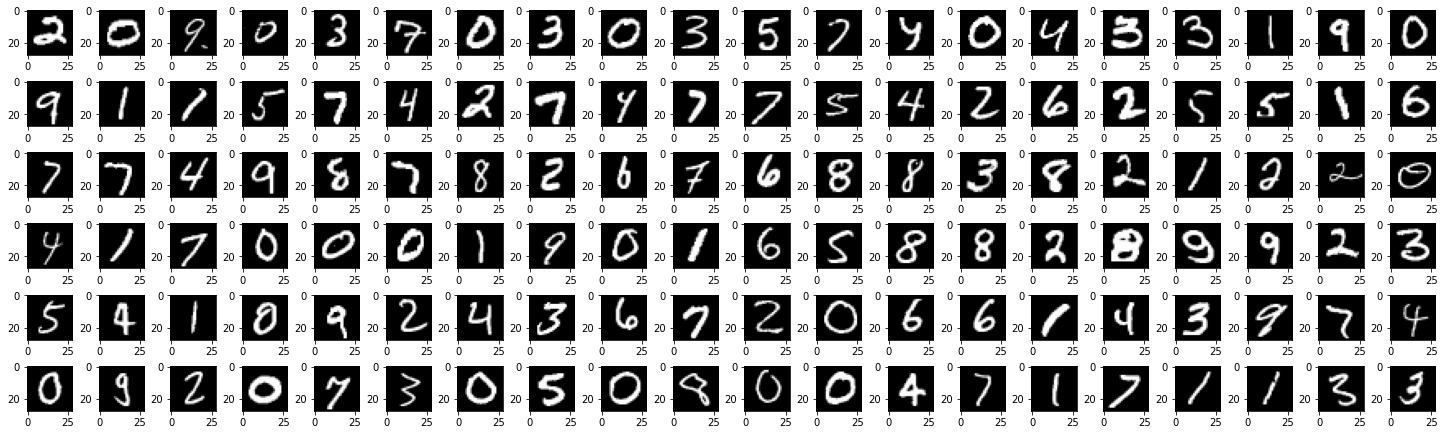

In [10]:
rows, cols = 6, 20
fig, axs = plt.subplots(rows, cols, figsize = (20, 6))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(X_train[cols*i + j], cmap='gray')
fig.tight_layout(pad=0.5)
plt.show()

In [11]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [12]:
x_train = np.array(x_train, dtype = np.float16)
x_train = np.resize(x_train, (* x_train.shape[:3], 1))

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
model = keras.Sequential([
    Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(10, activation = 'softmax')
])

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [17]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 10, min_delta = 0.0001, restore_best_weights = True)

In [18]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100, callbacks = early_stopping)

Epoch 1/100
1500/1500 [==============================] - 75s 50ms/step - loss: 0.3431 - accuracy: 0.9157 - val_loss: 0.0701 - val_accuracy: 0.9795
Epoch 2/100
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0856 - accuracy: 0.9747 - val_loss: 0.0550 - val_accuracy: 0.9844
Epoch 3/100
1500/1500 [==============================] - 67s 45ms/step - loss: 0.0700 - accuracy: 0.9793 - val_loss: 0.0578 - val_accuracy: 0.9837
Epoch 4/100
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0615 - accuracy: 0.9821 - val_loss: 0.0513 - val_accuracy: 0.9848
Epoch 5/100
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0574 - accuracy: 0.9825 - val_loss: 0.0461 - val_accuracy: 0.9862
Epoch 6/100
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0480 - accuracy: 0.9859 - val_loss: 0.0428 - val_accuracy: 0.9879
Epoch 7/100
1500/1500 [==============================] - 73s 49ms/step - loss: 0.0452 - accuracy: 0.9872 - val_loss: 0

<AxesSubplot:>

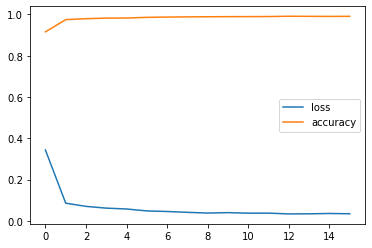

In [19]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'accuracy']].plot()

In [20]:
x_test = np.resize(x_test, (* x_test.shape[:3], 1))

In [21]:
pred = model.predict(x_test)

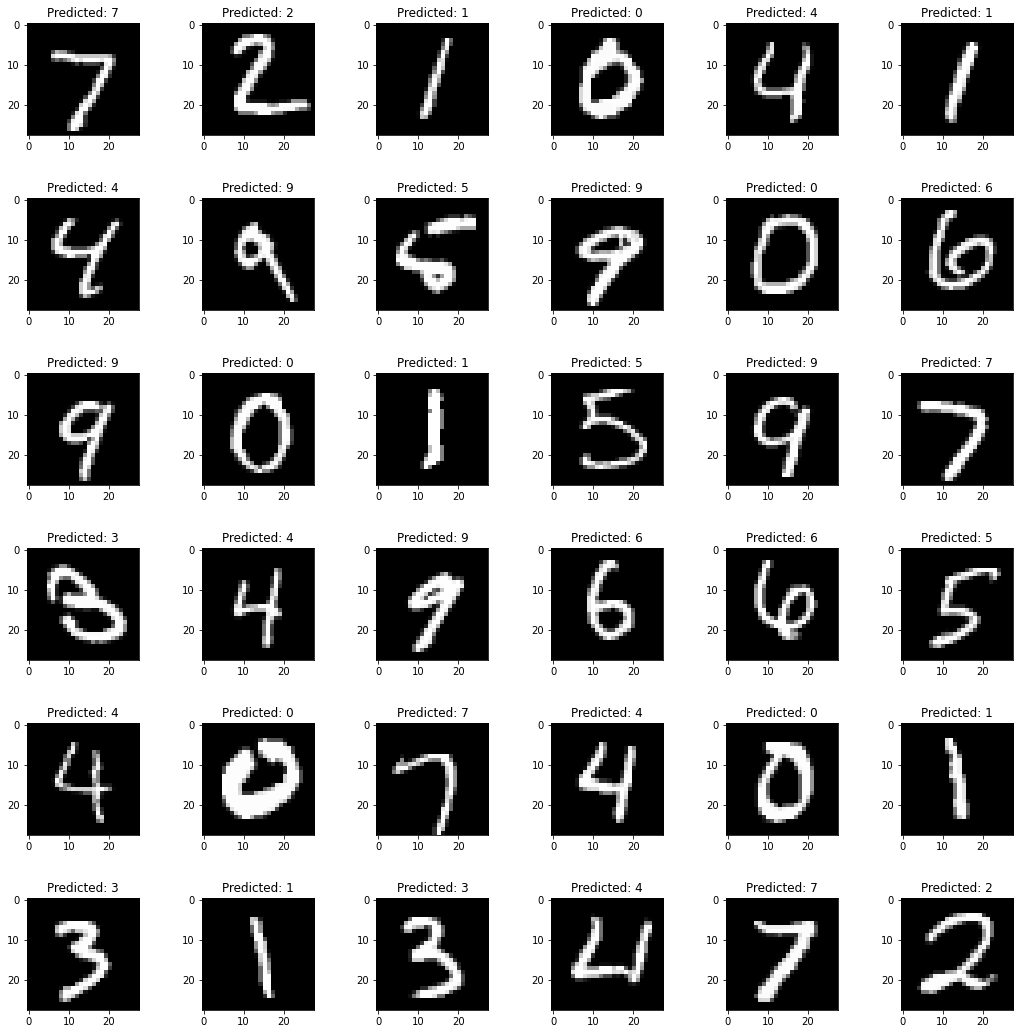

In [22]:
rows, cols = 6, 6
fig, axs = plt.subplots(rows, cols, figsize = (15, 15))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(x_test[rows*i + j], cmap='gray')
        axs[i][j].set_title("Predicted: "+str(list(pred[rows*i + j]).index(max(list(pred[rows*i + j])))))
fig.tight_layout(pad=3.0)
plt.show()

In [23]:
def histogram(pred):
    xhist = []
    for item in range(10):
        for j in range(int(pred[item] * 100)):
            xhist.append(item)
    return xhist
    
def c(item):
    return [0 if i != item.index(max(item)) else 1 for i in item]

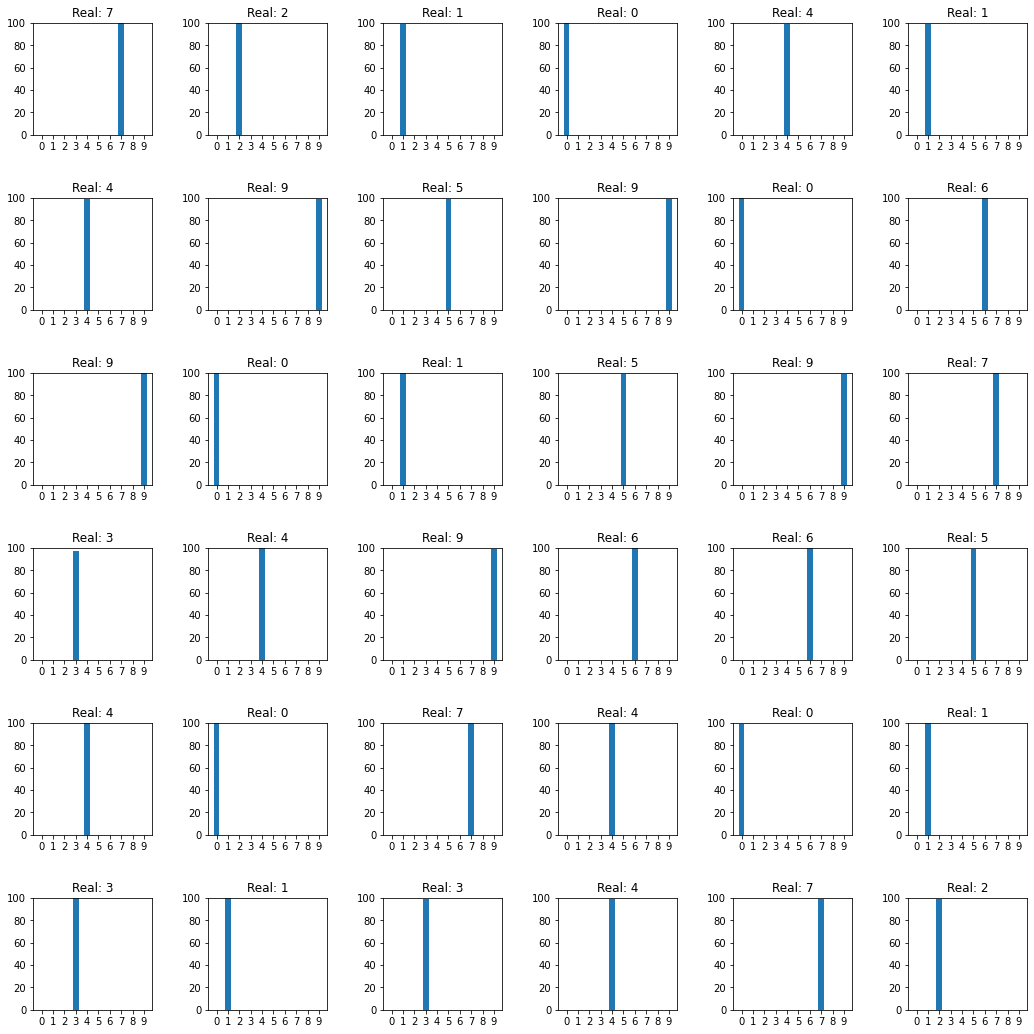

In [24]:
rows, cols = 6, 6
fig, axs = plt.subplots(rows, cols, figsize = (15, 15))
for i in range(rows):
    for j in range(cols):
        axs[i][j].hist(histogram(pred[rows*i + j]), bins = np.linspace(-0.25, 9.25, 20))
        axs[i][j].set_xticks(range(10))
        axs[i][j].set_ylim((0, 100))
        axs[i][j].set_title("Real: "+str(y_test[rows*i + j]))
fig.tight_layout(pad=3.0)
plt.show()

In [25]:
def setup(pred):
    return list(map(lambda x: list(x).index(np.max(x)), pred))

In [26]:
final_pred = setup(pred)

In [27]:
from sklearn.metrics import confusion_matrix
df_conf=pd.DataFrame(confusion_matrix(final_pred, y_test), columns = range(10))
df_conf

,0,1,2,3,4,5,6,7,8,9
0,976,0,1,0,0,1,3,0,2,0
1,0,1129,0,0,0,0,2,2,0,1
2,1,2,1028,2,0,0,0,15,2,1
3,0,2,0,1005,0,4,0,1,3,0
4,0,0,0,0,967,0,1,1,0,6
5,0,0,0,2,0,884,2,0,1,5
6,2,1,0,0,1,2,945,0,3,0
7,1,0,2,0,0,0,0,1006,0,5
8,0,1,1,1,0,1,4,0,962,2
9,0,0,0,0,14,0,1,3,1,989


In [28]:
from sklearn.metrics import classification_report
print(classification_report(final_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       983
           1       0.99      1.00      1.00      1134
           2       1.00      0.98      0.99      1051
           3       1.00      0.99      0.99      1015
           4       0.98      0.99      0.99       975
           5       0.99      0.99      0.99       894
           6       0.99      0.99      0.99       954
           7       0.98      0.99      0.99      1014
           8       0.99      0.99      0.99       972
           9       0.98      0.98      0.98      1008

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
test = test.to_numpy()
test = np.resize(test, (total, width, height))
test = np.resize(test, (* test.shape[:3], 1))

In [30]:
pred = model.predict(test)
final_pred = setup(pred)

In [31]:
output = pd.DataFrame(final_pred, columns = ['Label']); output.index += 1; output.head()

,Label
1,2
2,0
3,9
4,9
5,3


In [32]:
final_pred[:5]

[2, 0, 9, 9, 3]

In [33]:
output.to_csv('output.csv', index_label = 'ImageId')